In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [4]:
# Create 5-d array of data
tensorOrder = 5;
array_5d = 5*np.ones(pow(3, tensorOrder)).reshape((3, 3, 3, 3, 3));

# Create a tensor of order 5
tensor_5d = Tensor(array_5d)
print(tensor_5d);

# tensor_5d.data

This tensor is of order 5 and consists of 243 elements.
Sizes and names of its modes are (3, 3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


In [5]:
# Calculate Frobenious norm
tensor_5d_FrobNorm = tensor_5d.frob_norm
print("The Frobenious norm of this 5-order tensor is ", tensor_5d_FrobNorm)

The Frobenious norm of this 5-order tensor is  77.94228634059948


### Solution: Part 2

In [6]:
# Create tensors and collect information
dimSize = 2;
tensorOrders = range(3,21);
numOfElements = np.zeros(np.size(tensorOrders))
index = 0;

for order_ith in tensorOrders:
    # specify the shape of tensor
    tensorShape = np.round(dimSize*np.ones(order_ith)).astype(int);
    # create the array
    array_temp = np.ones(pow(dimSize, order_ith)).reshape(tensorShape);
    # convert the array to a tensor
    tensor_temp = Tensor(array_temp);
    # count the number of elements
    numOfElements[index] = np.size(tensor_temp.data)
    index += 1
    

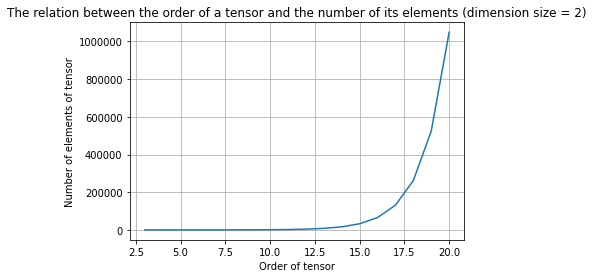

In [7]:
# Plot results
plt.plot(tensorOrders, np.round(numOfElements).astype(int));
plt.title("The relation between the order of a tensor and the number of its elements (dimension size = 2)");
plt.xlabel("Order of tensor");
plt.ylabel("Number of elements of tensor");
plt.ticklabel_format(axis="both", style="plain");
plt.grid();

### Solution: Part 3

In [8]:
# Create tensors and collect information
dimSizes = range(3,16);
tensorOrder = 3;
numOfElements = np.zeros(np.size(dimSizes));
index = 0;

for dimSize_ith in dimSizes:
    # specify the shape of tensor
    tensorShape = np.round(dimSize_ith*np.ones(tensorOrder)).astype(int);
    # create the array
    array_temp = np.ones(pow(dimSize_ith, tensorOrder)).reshape(tensorShape);
    # convert the array to a tensor
    tensor_temp = Tensor(array_temp);
    # count the number of elements
    numOfElements[index] = np.size(tensor_temp.data)
    index += 1

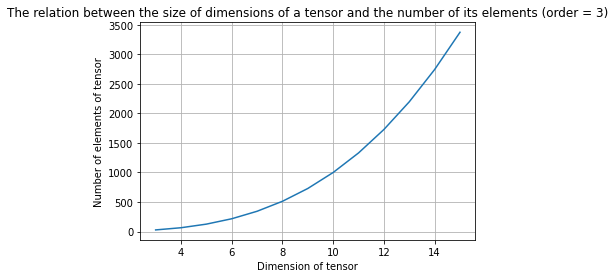

In [9]:
# Plot results
plt.plot(dimSizes, np.round(numOfElements).astype(int));
plt.title("The relation between the size of dimensions of a tensor and the number of its elements (order = 3)");
plt.xlabel("Dimension of tensor");
plt.ylabel("Number of elements of tensor");
plt.ticklabel_format(axis="both", style="plain");
plt.grid();

### Solution: Part 4

**Include comparison and analysis here**

Two figures plotted in above two parts demonstrate the curse of dimensionality. When the size of each dimenson is fixed (e.g., $M = 2$), the number of elements of a tensor ($N$) grows exponentially with its order ($ k $). The relation displayed in Part 2 can be expressed as $ N = M^k = 2^k $. By comparison, when the tensor order is fixed, the number of elements grows polynimally with the size of dimension. In Part 3, the tensor order is set as 3, and the cubic growth of tensor elements can be observed ($ N = M^3 $). Thus, either large dimension size or tensor order can result in the considerably large number of elements. The large number of elements have strict requirement on the hardware storage and results in high computational cost.

Besides, compared with the lagre size of dimension, the high tensor order is more likely to cause the large number of element. For example, when $k = 3$ and $M = 20$, $N_1 = 20^3 = 8000$. However, when $k = 20$ and $M = 2$, $N_2 = 2^{20} = {1048578} $. $N_2$ is about 100 times larger than $N_1$. Thus, users should be more care cautious about the growth of tensor order.


# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [12]:
# Create a tensor of order 4 with 81 elements
tensorOrder = 4;
array_4d = np.arange(81).reshape((3, 3, 3, 3));

tensor_4d = Tensor(array_4d)
print(tensor_4d);

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [13]:
# Display slices - mode 1 & 2
for i in range(0,3):
    for j in range(0,3):
        print(tensor_4d.data[i,:,:,j]);

[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
[[ 1  4  7]
 [10 13 16]
 [19 22 25]]
[[ 2  5  8]
 [11 14 17]
 [20 23 26]]
[[27 30 33]
 [36 39 42]
 [45 48 51]]
[[28 31 34]
 [37 40 43]
 [46 49 52]]
[[29 32 35]
 [38 41 44]
 [47 50 53]]
[[54 57 60]
 [63 66 69]
 [72 75 78]]
[[55 58 61]
 [64 67 70]
 [73 76 79]]
[[56 59 62]
 [65 68 71]
 [74 77 80]]


In [14]:
# Display fibers - mode 1
print(tensor_4d.data[0,:,0,0]);
print(tensor_4d.data[1,:,0,0]);
print(tensor_4d.data[2,:,0,0]);
print(tensor_4d.data[0,:,1,0]);
print(tensor_4d.data[0,:,2,0]);

[ 0  9 18]
[27 36 45]
[54 63 72]
[ 3 12 21]
[ 6 15 24]


### Solution: Part 2

In [15]:
# Create a tensor of order 3
tensorOrder = 3;
array_3d = np.ones(40).reshape((4,2,5));

tensor_3d = Tensor(array_3d);

for i in range(1,5):
    tensor_3d.data[:,:,i] = 2*tensor_3d.data[:,:,i-1]
    
print(tensor_3d.data);

[[[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [17]:
# Create 4-d array of data
array_4d = np.arange(360).reshape((3, 5, 3, 8))

# Create a tensor
tensor_4d = Tensor(array_4d)

# Result preview
print(tensor_4d)
#tensor_4d.data

This tensor is of order 4 and consists of 360 elements.
Sizes and names of its modes are (3, 5, 3, 8) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [18]:
# unfold along second mode (i.e., mode - 1)
tensor_2d = tensor_4d.unfold(mode=1, inplace=False);
# Display unfolded version
print(tensor_2d)
tensor_2d.data

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
         37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 264, 265, 266, 267,
        268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
        281, 282, 283, 284, 285, 286, 287],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71, 168, 169,
        170, 171, 172, 173, 174, 175

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [20]:
# Create original 3-rd tensor 
array_3d = np.arange(80).reshape((5,4,4));

# Create a tensor
tensor_3d_X = Tensor(array_3d)

In [21]:
# Create matrix
matrix_A = np.arange(20).reshape((5,4));

In [22]:
# Perform mode-1 product 
product_Y = tensor_3d_X.mode_n_product(matrix_A, mode=1, inplace=False)
print(product_Y)
product_Y.data

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (5, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[  56,   62,   68,   74],
        [ 152,  174,  196,  218],
        [ 248,  286,  324,  362],
        [ 344,  398,  452,  506],
        [ 440,  510,  580,  650]],

       [[ 152,  158,  164,  170],
        [ 504,  526,  548,  570],
        [ 856,  894,  932,  970],
        [1208, 1262, 1316, 1370],
        [1560, 1630, 1700, 1770]],

       [[ 248,  254,  260,  266],
        [ 856,  878,  900,  922],
        [1464, 1502, 1540, 1578],
        [2072, 2126, 2180, 2234],
        [2680, 2750, 2820, 2890]],

       [[ 344,  350,  356,  362],
        [1208, 1230, 1252, 1274],
        [2072, 2110, 2148, 2186],
        [2936, 2990, 3044, 3098],
        [3800, 3870, 3940, 4010]],

       [[ 440,  446,  452,  458],
        [1560, 1582, 1604, 1626],
        [2680, 2718, 2756, 2794],
        [3800, 3854, 3908, 3962],
        [4920, 4990, 5060, 5130]]])

In [23]:
# Validate equivalence between the left and right hand side
LHS = product_Y.unfold(mode=1, inplace=False).data
RHS = np.matmul(matrix_A, tensor_3d_X.unfold(mode=1, inplace=False).data);
print("LHS = RHS?: ", np.array_equal(LHS, RHS));

LHS = RHS?:  True


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [24]:
# Create original 3-rd tensor 
array_3d = np.arange(120).reshape((4,5,6));

# Create tensor
tensorX = Tensor(array_3d)

In [25]:
# Create matrices
matrixA = np.arange(30).reshape((6,5));
matrixB = np.arange(24).reshape((4,6));

In [26]:
# Validate property 1

XAB = tensorX.mode_n_product(matrixA, mode=1, inplace=False).mode_n_product(matrixB, mode=2, inplace=False);
XBA = tensorX.mode_n_product(matrixB, mode=2, inplace=False).mode_n_product(matrixA, mode=1, inplace=False);

print("LHS = RHS?: ", np.array_equal(XAB.data, XBA.data));
print("\n\nX xn A xm B: ", XAB.data);
print("\n\nX xm B xn A: ", XBA.data);

LHS = RHS?:  True


X xn A xm B:  [[[   3250   10630   18010   25390]
  [   9125   29555   49985   70415]
  [  15000   48480   81960  115440]
  [  20875   67405  113935  160465]
  [  26750   86330  145910  205490]
  [  32625  105255  177885  250515]]

 [[   7750   25930   44110   62290]
  [  24875   83105  141335  199565]
  [  42000  140280  238560  336840]
  [  59125  197455  335785  474115]
  [  76250  254630  433010  611390]
  [  93375  311805  530235  748665]]

 [[  12250   41230   70210   99190]
  [  40625  136655  232685  328715]
  [  69000  232080  395160  558240]
  [  97375  327505  557635  787765]
  [ 125750  422930  720110 1017290]
  [ 154125  518355  882585 1246815]]

 [[  16750   56530   96310  136090]
  [  56375  190205  324035  457865]
  [  96000  323880  551760  779640]
  [ 135625  457555  779485 1101415]
  [ 175250  591230 1007210 1423190]
  [ 214875  724905 1234935 1744965]]]


X xm B xn A:  [[[   3250   10630   18010   25390]
  [   9125   29555   49985   70415]
  [  1

In [27]:
# Validate property 2

XAB = tensorX.mode_n_product(matrixA, mode=1, inplace=False).mode_n_product(matrixB, mode=1, inplace=False);
X_AB = tensorX.mode_n_product(np.matmul(matrixB,matrixA), mode=1, inplace=False)

print("LHS = RHS?: ", np.array_equal(XAB.data, X_AB.data));
print("\n\nX xm A xn B: ", XAB.data);
print("\n\nX xn (B x A): ", X_AB.data);

LHS = RHS?:  True


X xm A xn B:  [[[  19200   20725   22250   23775   25300   26825]
  [  52680   56815   60950   65085   69220   73355]
  [  86160   92905   99650  106395  113140  119885]
  [ 119640  128995  138350  147705  157060  166415]]

 [[  64950   66475   68000   69525   71050   72575]
  [ 176730  180865  185000  189135  193270  197405]
  [ 288510  295255  302000  308745  315490  322235]
  [ 400290  409645  419000  428355  437710  447065]]

 [[ 110700  112225  113750  115275  116800  118325]
  [ 300780  304915  309050  313185  317320  321455]
  [ 490860  497605  504350  511095  517840  524585]
  [ 680940  690295  699650  709005  718360  727715]]

 [[ 156450  157975  159500  161025  162550  164075]
  [ 424830  428965  433100  437235  441370  445505]
  [ 693210  699955  706700  713445  720190  726935]
  [ 961590  970945  980300  989655  999010 1008365]]]


X xn (B x A):  [[[  19200   20725   22250   23775   25300   26825]
  [  52680   56815   60950   65085   69220   73355]
  [  

### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


The equation used in Assignment 4 is:
$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

According to the tensor unfolding property, 
$$\mathbf{\underline{Y}} \xrightarrow{n} \mathbf{Y}_{(n)}$$

The assumption is made that $\mathbf{A}$ is a $m$ by $k$ matrix, and $\mathbf{B}$ is a $t$ by $m$ matrix.
$$ \mathbf{A} \in \mathbb{R}^{m\times k},  \mathbf{B} \in \mathbb{R}^{t\times m} $$ 

The size of $n^{th}$ dimension of tensor $\mathbf{\underline{Y}}$ is $m$, and $\mathbf{Y}_{(n)}$ has $m$ columns. Thus. the following multiplication is applicable.

The product of $\mathbf{\underline{Y}}$ and $\mathbf{B}$ is:
$$ \mathbf{\underline{Z}} = \mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{Y}} \times_n \mathbf{B}$$

The unfolding matrix $\mathbf{Z}_{(n)}$ now can be expressed as,
$$ \mathbf{\underline{Z}} \xrightarrow{n} \mathbf{Z}_{(n)} = \mathbf{B} \mathbf{Y}_{(n)} = \mathbf{B} \mathbf{A} \mathbf{X}_{(n)} = (\mathbf{B}\mathbf{A}) \times \mathbf{X}_{(n)} \quad \Leftrightarrow  \quad \mathbf{\underline{Z}} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A}) $$

By comparing two expressions of $\mathbf{\underline{Z}}$, the target equation is proved.
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$